In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
from time import time
import pandasql as ps
import functools

In [2]:
df_path = r"PS_Homework_data_set.csv"
df = pd.read_csv(df_path)
df_workable = df.copy()
df_workable.drop(['Unnamed: 0','date_assignment_starts','date_assignment_ends'], axis=1, inplace=True) #Why? Explained in the EDA
df_workable.head()

,advertiser_id,assigned,first_revenue_date,date_created,age,assign_days,revenue
0,485,1,NaN,2006-07-14,3855,138,NaN
1,598,1,NaN,2006-08-02,3836,138,NaN
2,673,1,NaN,2006-08-17,3821,86,NaN
3,813,1,NaN,2006-09-12,3795,138,NaN
4,1132,1,NaN,2006-11-02,3744,138,NaN


In [3]:
date_column = ['date_created','first_revenue_date']

for d in date_column:
    df_workable[d] = df_workable[d].astype('datetime64[ns]')

In [4]:
df_workable['diff_rev'] = df_workable['first_revenue_date'] -  df_workable['date_created'] 
df_workable['diff_rev'] = df_workable.diff_rev.apply(lambda x: x.days)
df_workable.drop(['first_revenue_date','advertiser_id'], axis =1 , inplace=True)

In [5]:
df_workable

,assigned,date_created,age,assign_days,revenue,diff_rev
0,1,2006-07-14,3855,138,NaN,NaN
1,1,2006-08-02,3836,138,NaN,NaN
2,1,2006-08-17,3821,86,NaN,NaN
3,1,2006-09-12,3795,138,NaN,NaN
4,1,2006-11-02,3744,138,NaN,NaN
...,...,...,...,...,...,...
77886,1,2017-02-23,-22,138,9643000.0,0.0
77887,1,2017-02-23,-22,138,NaN,NaN
77888,1,2017-02-24,-23,138,NaN,NaN
77889,1,2017-02-28,-27,138,NaN,NaN


## Question 1
### a. How many leads are represented in this dataset? 
### b. Describe both the assigned and unassigned populations.
### c. What is the average revenue of each group?

### Answer 1a:
#### Assuming that each lead has been assigned a unique advertiser id. Therefore, each unqiue value in the column 'advertiser_id' has been considered as a lead.

In [6]:
print(f'Total number of leads represented in the dataset are {df["advertiser_id"].nunique()}')

Total number of leads represented in the dataset are 77891


### Answer 1b:
#### Assigned and Unassigned populations


In [7]:
print(f"Refering to the column 'assigned' in the dataset, there are:\n{df['assigned'][df.assigned==1].count()} assigned leads and\n{df['assigned'][df.assigned==0].count()} unassigned leads in total")

Refering to the column 'assigned' in the dataset, there are:
37079 assigned leads and
40812 unassigned leads in total


#### It can be visually seen as:

<AxesSubplot:xlabel='assigned', ylabel='count'>

findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.


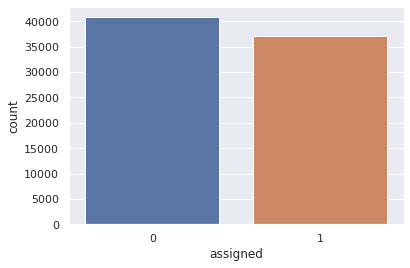

In [8]:
sns.countplot(x="assigned", data=df_workable)

In [9]:
df_workable[df_workable.assigned==1].describe()

,assigned,age,assign_days,revenue,diff_rev
count,37079.0,37079.000000,37079.000000,1.565000e+03,5583.000000
mean,1.0,638.015966,116.594487,7.673686e+07,171.618664
std,0.0,533.988314,42.409737,1.863678e+08,306.714658
min,1.0,-27.000000,-2.000000,1.200000e+04,0.000000
25%,1.0,190.000000,136.000000,8.060268e+06,0.000000
50%,1.0,544.000000,138.000000,2.318009e+07,14.000000
75%,1.0,995.000000,138.000000,5.854837e+07,204.000000
max,1.0,3855.000000,138.000000,2.500000e+09,2694.000000


In [10]:
df_workable[df_workable.assigned==0].describe()

,assigned,age,assign_days,revenue,diff_rev
count,40812.0,40812.000000,40812.000000,1.775000e+03,2850.000000
mean,0.0,11.907919,124.014971,2.388942e+07,26.966667
std,0.0,101.619484,36.355873,1.576417e+08,102.229832
min,0.0,0.000000,0.000000,1.300000e+04,0.000000
25%,0.0,0.000000,136.000000,5.653500e+06,0.000000
50%,0.0,0.000000,137.000000,1.235334e+07,1.000000
75%,0.0,0.000000,137.000000,2.467204e+07,13.000000
max,0.0,3097.000000,138.000000,6.533791e+09,1417.000000


### Distribution of Assigned and non-assigned leads with other variables

#### a. Distribution of Revenue

Text(0.5, 1.0, 'Distribution of revenue for non-assigned leads')

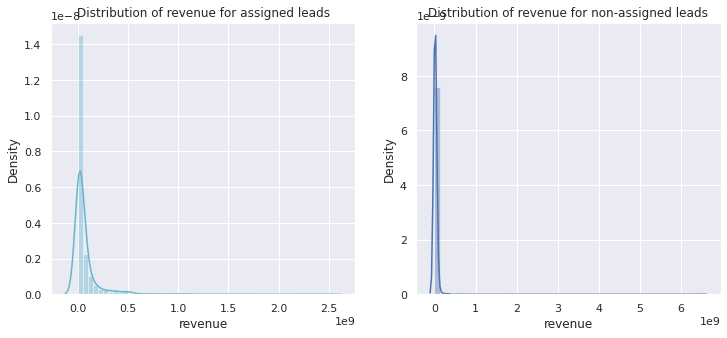

In [11]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df_workable[(df_workable.assigned == 1)]["revenue"],color='c',ax=ax)
ax.set_title('Distribution of revenue for assigned leads')

ax=f.add_subplot(122)
sns.distplot(df_workable[(df_workable.assigned == 0)]['revenue'],color='b',ax=ax)
ax.set_title('Distribution of revenue for non-assigned leads')

<AxesSubplot:xlabel='assigned', ylabel='revenue'>

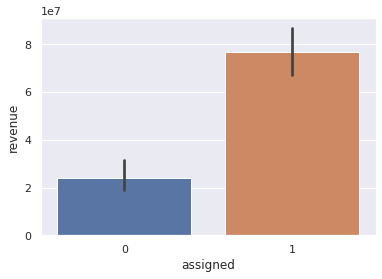

In [12]:
sns.barplot(x="assigned", y="revenue", data=df_workable)

In [13]:
total_revenue = df_workable['revenue'].sum()
assigned_revenue = df_workable[(df_workable.assigned == 1)]['revenue'].sum()
unassigned_revenue = df_workable[(df_workable.assigned == 0)]['revenue'].sum()

In [14]:
print(f"Assigned leads are producing {round(assigned_revenue/total_revenue*100,3)} % of the total revenue" )

Assigned leads are producing 73.905 % of the total revenue


In [15]:
df_assigned_cont = df_workable[(df_workable.assigned == 1)].drop('assigned',axis =1)
df_unassigned_cont = df_workable[(df_workable.assigned == 0)].drop('assigned',axis =1)

Text(0.5, 1.0, 'Correlation of variables in the unassigned population')

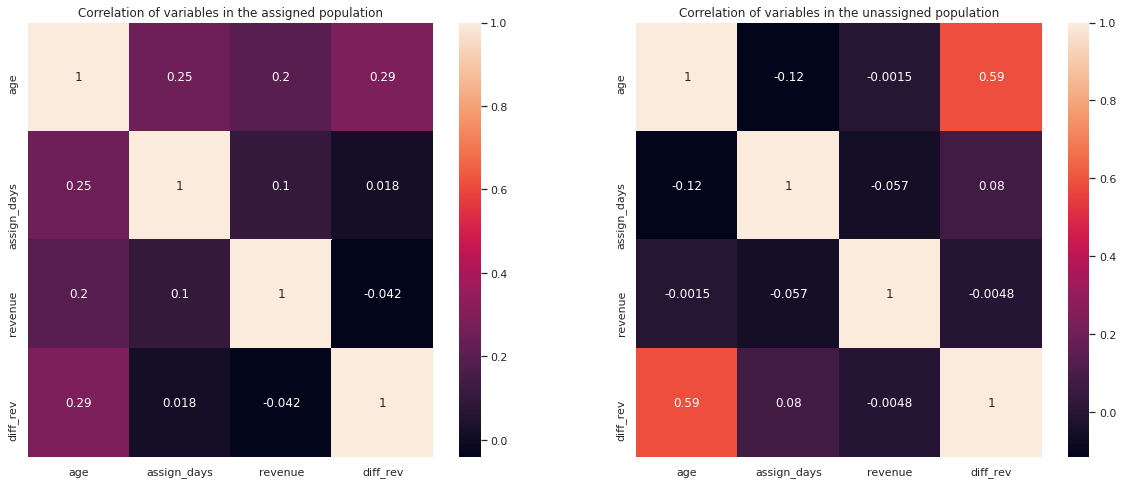

In [16]:
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.heatmap(df_assigned_cont.corr(), annot=True,ax=ax)
ax.set_title('Correlation of variables in the assigned population')

ax=f.add_subplot(122)
sns.heatmap(df_unassigned_cont.corr(), annot=True,ax=ax)
ax.set_title('Correlation of variables in the unassigned population')

### Inference: 
1. The data does not follow a normal distribution and is right skewed.
2. Assigned leads are producing 73.905 % of the total revenue.
3. Correlation of variables associated with both assigned and unassigned leads is low with revenue.
4. Correlation of age with the diff_rev in the unassigned population is 0.59, which might be spurious.

#### b. Distribution of Age

Text(0.5, 1.0, 'Distribution of age for non-assigned leads')

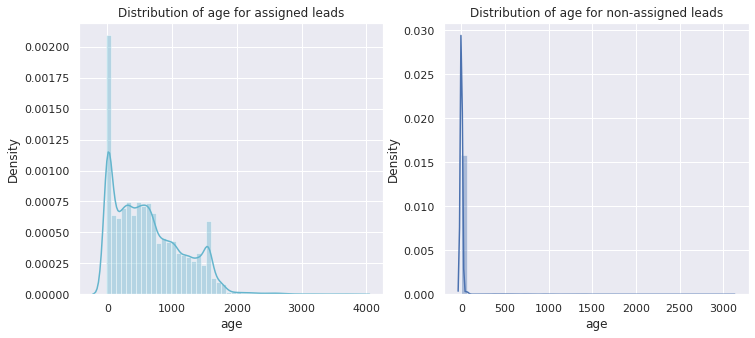

In [17]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df_workable[(df_workable.assigned == 1)]["age"],color='c',ax=ax)
ax.set_title('Distribution of age for assigned leads')

ax=f.add_subplot(122)
sns.distplot(df_workable[(df_workable.assigned == 0)]['age'],color='b',ax=ax)
ax.set_title('Distribution of age for non-assigned leads')

#### c. Distribution of assign_days

Text(0.5, 1.0, 'Distribution of assign_days for non-assigned leads')

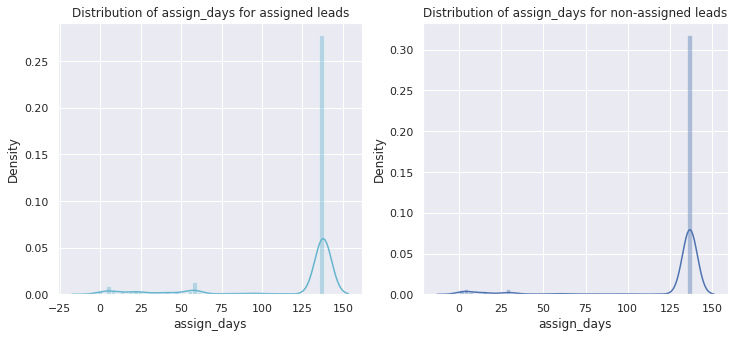

In [18]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df_workable[(df_workable.assigned == 1)]["assign_days"],color='c',ax=ax)
ax.set_title('Distribution of assign_days for assigned leads')

ax=f.add_subplot(122)
sns.distplot(df_workable[(df_workable.assigned == 0)]['assign_days'],color='b',ax=ax)
ax.set_title('Distribution of assign_days for non-assigned leads')

#### d. Distribution of diff_rev

Text(0.5, 1.0, 'Distribution of diff_rev for non-assigned leads')

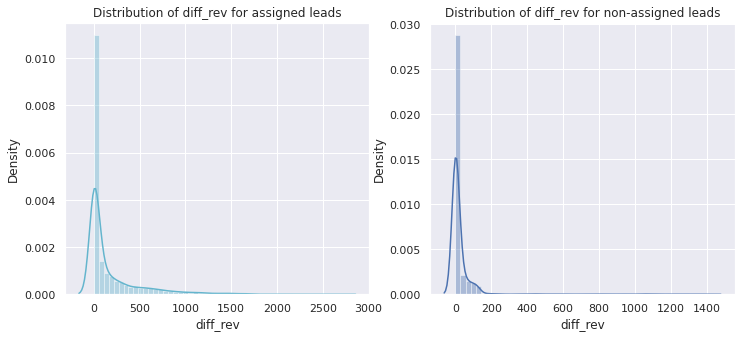

In [19]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df_workable[(df_workable.assigned == 1)]["diff_rev"],color='c',ax=ax)
ax.set_title('Distribution of diff_rev for assigned leads')

ax=f.add_subplot(122)
sns.distplot(df_workable[(df_workable.assigned == 0)]['diff_rev'],color='b',ax=ax)
ax.set_title('Distribution of diff_rev for non-assigned leads')

### Answer 1c:
### The average revenue of each group




In [20]:
rev = df_workable.groupby('assigned')['revenue'].mean()

In [21]:
avg_assigned_revenue = round(df_workable[(df_workable.assigned == 1)]['revenue'].mean(),2)
avg_unassigned_revenue = round(df_workable[(df_workable.assigned == 0)]['revenue'].mean(),2)

In [22]:
print(f"The average revenue generated by the:\nassigned leads = {avg_assigned_revenue} and\nunassigned leads = {avg_unassigned_revenue}")

The average revenue generated by the:
assigned leads = 76736860.96 and
unassigned leads = 23889416.04


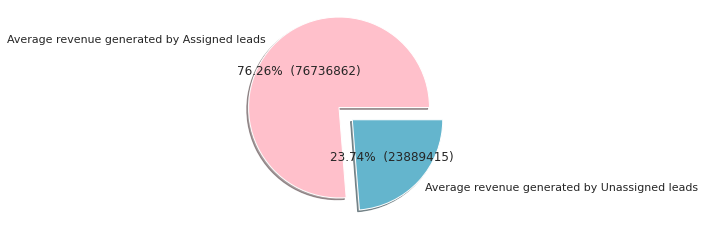

In [23]:
y = np.array([avg_assigned_revenue, avg_unassigned_revenue])
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
total = sum(y)
labels = ["Average revenue generated by Assigned leads", "Average revenue generated by Unassigned leads"]
explode = [0.2, 0]
colors = ["pink", "c"]
def make_autopct(y):
    def my_autopct(pct):
        total = sum(y)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(y, labels = labels, autopct=make_autopct(y), explode = explode, shadow = True, colors = colors)
plt.show() 

### Question 2
#### What are the most important metrics to consider when answering the problem statement? Why?

1. In evaluation metrices we should look out for shoudl be log matrix and RMSLE since the data is not normal and is highly skewed.
2. In business terms, we should try to capture the information that outliers can supply to the descriptive and prescriptive analysis.
3. We should establish and plot a relationship between gain and lift Charts
4. In which ratio the revenue is increasing in which terms, how much is it dependent on the other input variables and by what percentage.
5. We can begin forecasting revenue using time series forecasting models as per the trend, so that we can set targets for the sales reps. 

### Question 3
#### Analyze any existing relationship between account age and revenue.

### Answer 3:
Detecting outliers in age column
1. Visualizing via boxplot

Text(0.5, 0, 'Age')

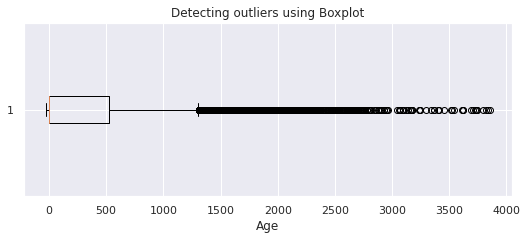

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(df_workable['age'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Age')

#### Detecting outliers using the Z-scores

In [25]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(df_workable['age'])
    std = np.std(df_workable['age'])
    # print(mean, std)
    for i in df_workable['age']:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
z_sample_outliers = detect_outliers_zscore(df['age'])
#print("Outliers from Z-scores method: ", z_sample_outliers)

#### Detecting outliers using the Inter Quantile Range(IQR)

In [26]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(df['age'])
    q1 = np.percentile(df['age'], 25)
    q3 = np.percentile(df['age'], 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
iqr_sample_outliers = detect_outliers_iqr(df['age'])
#print("Outliers from IQR method: ", iqr_sample_outliers)

In [27]:
def count_outliers(sample_outliers):
    no_of_outliers = len(sample_outliers)
    perc_of_outliers = (no_of_outliers / len(df['revenue']))*100
    return print(f"There are {no_of_outliers} outliers out of {len(df['revenue'])} values, which is approximately {round(perc_of_outliers,3)} % of the total values")

#### No. of Outliers as per Z score Analysis

In [28]:
count_outliers(z_sample_outliers)

There are 619 outliers out of 77891 values, which is approximately 0.795 % of the total values


#### No. of Outliers as per IQR Analysis

In [29]:
count_outliers(iqr_sample_outliers)

There are 5402 outliers out of 77891 values, which is approximately 6.935 % of the total values


We can either delete the rows with outliers but removing outliers is legitimate only for some specific reasons. Since I am not sure about the data columns about what exactly do they they defintion, I don't think that outliers should be removed  as outliers can be very informative about the subject-area. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. 

Outliers increase the variability in the data, which decreases statistical power.
Consequently, excluding outliers can cause the results to become statistically significant.
For now I'm not removing the outliers as they might contain some information that I wouldn't want to miss.

#### Instead I'm trying to segment age column into 4 categories

In [30]:
print(f"Min value of age: {df_workable['age'].min()}")
print(f"Max value of age: {df_workable['age'].max()}")

Min value of age: -27
Max value of age: 3855


Negative values of age in the unassigned samples seem very ambigious, I think that replacing every negative value with 0 would be a good idea for now as I'm not sure about what does a negative age signify

In [31]:
df_workable['age']=df_workable['age'].mask(df_workable['age']<0,0)

#### Segmenting age into 4 categories

Since we only have less than 5% values in the revenue column which is not very good to work with and imputing the missing values with sampling techniques like SMOTE, mean etc would make the data very biased so removing all the rows with null values in the revenue column for now as the relationship of revenue with age is to be inferred.

In [32]:
df_workable.dropna(inplace=True)

In [33]:
df_workable.shape

(3340, 6)

We only have 3340 rows left to work with. Data is less but the approach is to keep it real and unbiased to artificially created data.

In [34]:
bins= [0,801,1601,2401,3855]
labels = ['0-800','801-1600','1601-2400','2401-3856']
df_workable['AgeGroup'] = pd.cut(df_workable['age'], bins=bins, labels=labels, right=False)

In [35]:
df_workable

,assigned,date_created,age,assign_days,revenue,diff_rev,AgeGroup
20,1,2007-11-16,3365,138,707100000.0,0.0,2401-3856
41,1,2008-12-31,2954,138,500000000.0,6.0,2401-3856
45,1,2009-02-19,2906,56,121203000.0,2209.0,2401-3856
46,1,2009-02-26,2899,56,65185000.0,1.0,2401-3856
116,1,2010-01-12,2577,138,723566000.0,1282.0,2401-3856
...,...,...,...,...,...,...,...
77857,1,2017-02-14,0,138,122970596.0,3.0,0-800
77860,1,2017-02-16,0,138,124720.0,12.0,0-800
77878,1,2017-02-21,0,58,3012000.0,0.0,0-800
77879,1,2017-02-22,0,138,11100107.0,5.0,0-800


Analysing the count of assigned and unassigned classed in each age group

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

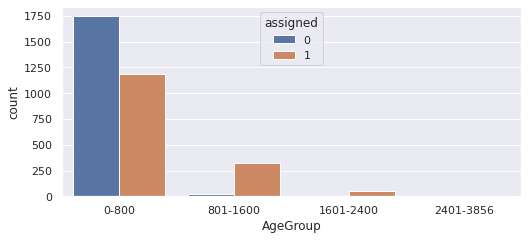

In [36]:
sns.countplot(x="AgeGroup", hue = 'assigned', data = df_workable)

In [37]:
df_workable.groupby('assigned')['AgeGroup'].value_counts()

assigned  AgeGroup 
0         0-800        1750
          801-1600       24
          1601-2400       1
1         0-800        1184
          801-1600      323
          1601-2400      52
          2401-3856       6
Name: AgeGroup, dtype: int64

It can be observed that the count of assigned and unassigned group is decreasing significantly as the age group is increasing.
Also, the age group '2401-3856' does not have a single unassigned lead and age group '1601-2400' only has 1 unassigned lead. 

<AxesSubplot:xlabel='AgeGroup', ylabel='revenue'>

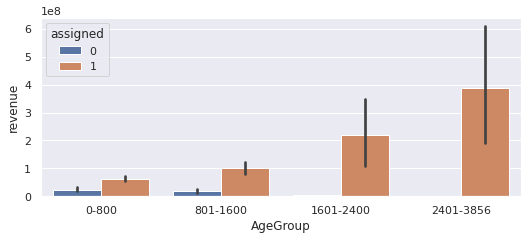

In [38]:
sns.barplot(x ='AgeGroup', y = 'revenue', hue = 'assigned',data = df_workable)

Though the count of assigned and unassigned leads is decreasing significantly as the age is increasing, revenue on the other hand is increasing.

Text(0.5, 1.0, 'Age vs Revenue for Unassigned leads')

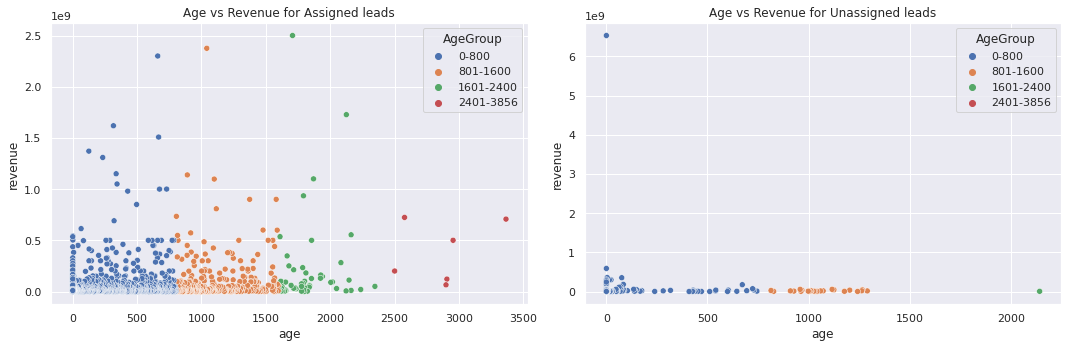

In [39]:
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.scatterplot(x='age',y='revenue', hue = 'AgeGroup',data = df_workable[df_workable.assigned==1], color='blue',ax=ax)
ax.set_title('Age vs Revenue for Assigned leads')

ax=f.add_subplot(122)
sns.scatterplot(x='age',y='revenue', hue = 'AgeGroup', data = df_workable[df_workable.assigned==0], color='purple',ax=ax)
ax.set_title('Age vs Revenue for Unassigned leads')

#### since we have dates in our data set, let's make it worth 

In [40]:
date_column = ['date_created']

for d in date_column:
    df_workable[d] = df_workable[d].astype('datetime64[ns]')

In [41]:
df_workable['year'] = df_workable['date_created'].dt.year
df_assigned = df_workable[(df_workable.assigned == 1)]
df_unassigned = df_workable[(df_workable.assigned == 0)]

df_assigned.reset_index(inplace=True)
df_unassigned.reset_index(inplace=True)

In [42]:
#df_workable.reset_index('date_created', inplace=True)
df_workable

,assigned,date_created,age,assign_days,revenue,diff_rev,AgeGroup,year
20,1,2007-11-16,3365,138,707100000.0,0.0,2401-3856,2007
41,1,2008-12-31,2954,138,500000000.0,6.0,2401-3856,2008
45,1,2009-02-19,2906,56,121203000.0,2209.0,2401-3856,2009
46,1,2009-02-26,2899,56,65185000.0,1.0,2401-3856,2009
116,1,2010-01-12,2577,138,723566000.0,1282.0,2401-3856,2010
...,...,...,...,...,...,...,...,...
77857,1,2017-02-14,0,138,122970596.0,3.0,0-800,2017
77860,1,2017-02-16,0,138,124720.0,12.0,0-800,2017
77878,1,2017-02-21,0,58,3012000.0,0.0,0-800,2017
77879,1,2017-02-22,0,138,11100107.0,5.0,0-800,2017


In [43]:
date_column = ['date_created']

for d in date_column:
    df_workable[d] = df_workable[d].astype('datetime64[ns]')

In [44]:
df_workable.set_index('date_created', inplace=True)
df_yoy_assigned = df_workable[(df_workable.assigned == 1)].resample('Y')["revenue"].sum().to_frame()
df_yoy_unassigned = df_workable[(df_workable.assigned == 0)].resample('Y')["revenue"].sum().to_frame()

In [45]:
df_workable.reset_index(inplace=True)

In [46]:
avg_revenue_ageGroup_assigned = df_assigned.groupby('AgeGroup')['revenue'].mean()
avg_revenue_ageGroup_unassigned = df_unassigned.groupby('AgeGroup')['revenue'].mean()

Text(0.5, 1.0, 'Average Revenue for Unassigned leads for different age groups')

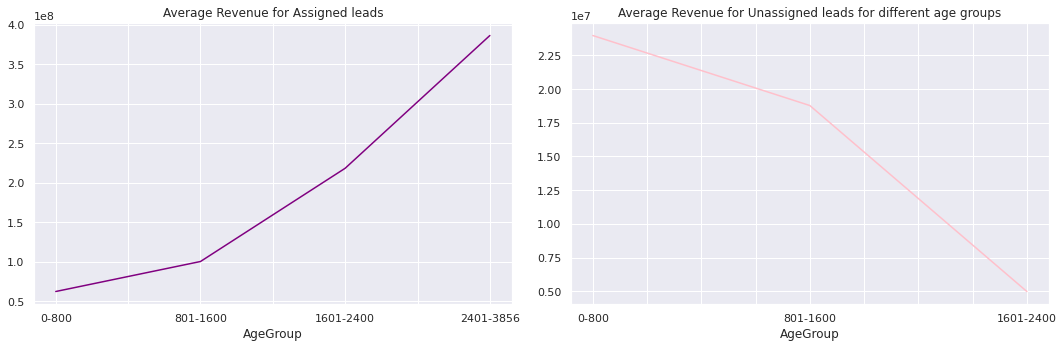

In [47]:
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
avg_revenue_ageGroup_assigned.plot(color='purple',ax=ax)
ax.set_title('Average Revenue for Assigned leads')

ax=f.add_subplot(122)
avg_revenue_ageGroup_unassigned.plot(color='pink',ax=ax)
ax.set_title('Average Revenue for Unassigned leads for different age groups')

In [48]:
date_column = ['date_created']

for d in date_column:
    df_workable[d] = df_workable[d].astype('datetime64[ns]')

In [49]:
df_workable.set_index('date_created',inplace=True)

In [50]:
df_monthly_assigned = df_workable[(df_workable.assigned == 1)].resample('M')["revenue"].sum().to_frame()
df_monthly_unassigned = df_workable[(df_workable.assigned == 0)].resample('M')["revenue"].sum().to_frame()

In [51]:
df_monthly_assigned

,revenue
date_created,
2007-11-30,7.071000e+08
2007-12-31,0.000000e+00
2008-01-31,0.000000e+00
2008-02-29,0.000000e+00
2008-03-31,0.000000e+00
...,...
2016-10-31,1.061086e+09
2016-11-30,1.469831e+09
2016-12-31,1.502163e+09


### Decomposing the dataset as a time series

Using Decomposition primarily as an analysis tool as it provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. We can address this explicitly in terms of modeling the trend and subtracting it from the data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

As multiplicative seasonality is not appropriate for zero and negative values, I will proceed with additive model

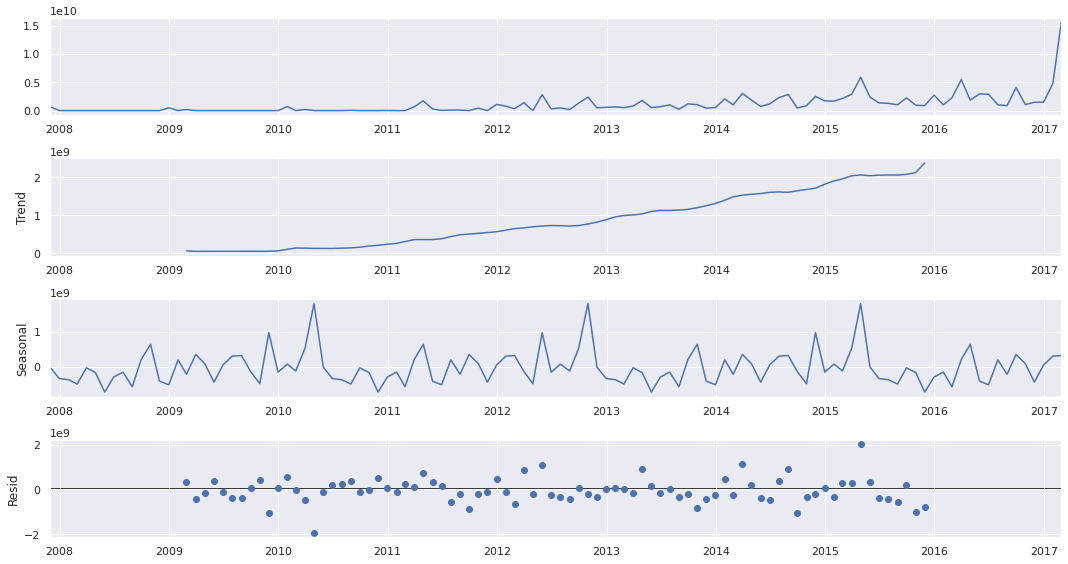

In [52]:
# Scoping the further reseacrh towards the assigned leads only as they are genrating most of revenue. We can also take time and analyse unassigned leads in another scope and discuss about how can we maximise revenue for unassigned leads
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_monthly_assigned, model = 'additive',freq=30)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

Trend → a general systematic linear or (most often) nonlinear component that changes over time and does not repeat

Seasonality → a general systematic linear or (most often) nonlinear component that changes over time and does repeat

We can see that the trend and seasonality information extracted from the series does seem reasonable. The residuals are also interesting, showing periods of variability in the early and later years of the series. There is a positive trend that can be seen over the years.

In [53]:
df_monAvg_age_assigned = df_workable[(df_workable.assigned == 1)].resample('M')["age"].mean().to_frame()

In [54]:
df_monAvg_age_assigned['age'].corr(df_monthly_assigned['revenue'])

-0.4608488916680694

There is a low correlation of -0.47 between age and revenue, but we need to check for causal relation between age and revenue as well. This is covered under the Granger causality test section below

In [55]:
df_all_assigned = pd.merge(df_monthly_assigned,df_monAvg_age_assigned, how='inner', on = 'date_created')
df_all_assigned.dropna(inplace=True)

In [56]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_all_assigned['revenue'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')

if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 0.9240375735334884
p-value: 0.9933961401126601
critical_values: {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}
Series is not stationary


In [57]:
result = adfuller(df_all_assigned['age'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 0.44370532898772136
p-value: 0.9830578102310259
critical_values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}
Series is not stationary


#### p-values of both the revenue and age variables are greater than the significant value (0.05), the Null hypothesis is valid and the series is not stationary.

### Tranforming data (differencing to make it stationary)

In [58]:
df_transformed = df_all_assigned.diff().dropna()
df_all_assigned = df_all_assigned.iloc[1:]
print(df_all_assigned.shape)
df_transformed.shape

(75, 2)


(75, 2)

## Testing for stationarity after differencing

In [59]:
result = adfuller(df_transformed['revenue'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -4.710214004661021
p-value: 8.05124503860645e-05
critical_values: {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}
Series is stationary


In [60]:
result = adfuller(df_transformed['age'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical_values: {result[4]}')
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -6.059076994850481
p-value: 1.2249311533231753e-07
critical_values: {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}
Series is stationary


In [61]:
df_transformed.reset_index(inplace=True)

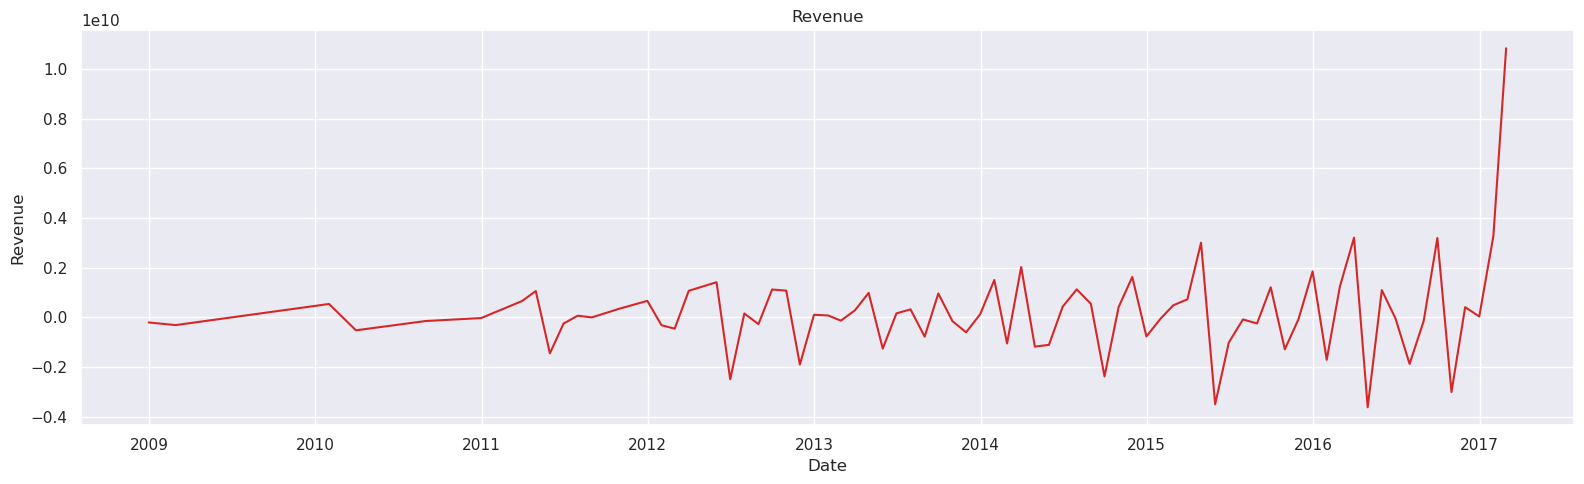

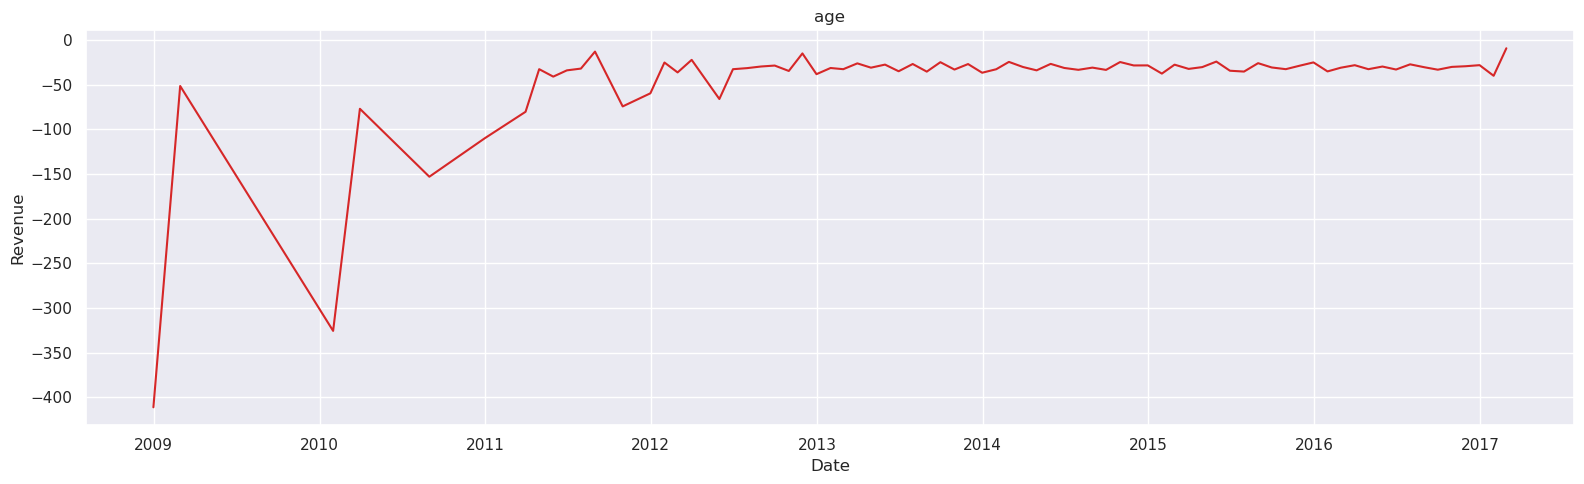

In [62]:
# Draw Plot
def plot_df(df_transformed, x, y, title="Yearly Revenue", xlabel='Date', ylabel='Revenue', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df_transformed, x=df_transformed.date_created, y=df_transformed.revenue, title='Revenue')   
plot_df(df_transformed, x=df_transformed.date_created, y=df_transformed.age, title='age')

Transformed revenue and age data are stationary, hence there is no need to go for second-order differencing. 

### Testing Granger Causality

Considering 4th lag as of now. 

Do age granger cause revenue?

 Null Hypothesis (H0) : age does not granger cause revenue.

Alternative Hypothesis (HA) : age granger cause revenue.

In [63]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_transformed[['revenue', 'age']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1609  , p=0.6895  , df_denom=71, df_num=1
ssr based chi2 test:   chi2=0.1677  , p=0.6822  , df=1
likelihood ratio test: chi2=0.1675  , p=0.6823  , df=1
parameter F test:         F=0.1609  , p=0.6895  , df_denom=71, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0476  , p=0.9536  , df_denom=68, df_num=2
ssr based chi2 test:   chi2=0.1021  , p=0.9502  , df=2
likelihood ratio test: chi2=0.1021  , p=0.9503  , df=2
parameter F test:         F=0.0476  , p=0.9536  , df_denom=68, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1040  , p=0.9575  , df_denom=65, df_num=3
ssr based chi2 test:   chi2=0.3455  , p=0.9513  , df=3
likelihood ratio test: chi2=0.3447  , p=0.9514  , df=3
parameter F test:         F=0.1040  , p=0.9575  , df_denom=65, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1167  , p=0.9761  , df_d

{1: ({'ssr_ftest': (0.16089918364021027, 0.6895346797182278, 71.0, 1),
   'ssr_chi2test': (0.16769774069543045, 0.6821660562233562, 1),
   'lrtest': (0.16750801017496997, 0.682336080935712, 1),
   'params_ftest': (0.16089918364020242, 0.6895346797182423, 71.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.04756478380950208, 0.9535803928314162, 68.0, 2),
   'ssr_chi2test': (0.10212438876746036, 0.9502195703740093, 2),
   'lrtest': (0.10205302113672587, 0.9502534784386978, 2),
   'params_ftest': (0.047564783809502534, 0.9535803928314126, 68.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.10396651587274894, 0.957463912931643, 65.0, 3),
   'ssr_chi2test': (0.34548872966944266, 0.9512580376517835, 3),
   'lrtest': (0.34466246581951054, 0.9514209873977784, 3),
   'params_ftest': (0.1039665158727487, 0.9574639129316459, 65.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

#### Since p-value is significantly higher than our normal significance level (alpha) , null hypothesis can be accepted and it can be concluded that "age" does not granger cause "revenue". This statistical hypothesis test determines that age time series is NOT  useful for forecasting revenue time series.This might probably be due to the abundance of missing values in the revenue column.

#### Business insights that can be drawn:

1. Business should focus more on the older leads than newer leads as the revenue generated by older age leads is significantly higher than the leads in the lower groups.
2. On a contrary, we can also infer that even with a less count of assigned sales rep in the older age groups, the revenue gets generated so we need to focus and improve more towards the newer leads for maximising thier revenue.
3. In Granger Causality, Since p-value is significantly higher than our normal significance level (alpha) , null hypothesis can be accepted and it can be concluded that "age" does not granger cause "revenue". This might probably be due to the abundance of missing values in the revenue column.
4. Once the analysis is done the next step is to begin forecasting using time series forecasting models, which I am keeping out of scope as of now.

### Question 4
#### What is the incremental value of assigning a lead to the sales team?

In [64]:
df_yoy_assigned_count = df_workable[(df_workable.assigned == 1)].resample('Y')["assigned"].count().to_frame()
df_yoy_unassigned_count = df_workable[(df_workable.assigned == 0)].resample('Y')["assigned"].count().to_frame()

In [65]:
df_yoy_assign_count = pd.merge(df_yoy_assigned_count,df_yoy_unassigned_count, how='outer', on = 'date_created')
df_yoy_assign_count['assigned_y'].dropna(inplace=True)
mode = df_yoy_assign_count['assigned_y'].mode().values[0]
df_yoy_assign_count['assigned_y'].fillna(value=mode, inplace=True)
df_yoy_assign_count.astype(int)
df_yoy_assign_count.reset_index(inplace=True)

Text(0.5, 1.0, 'Count of unassigned leads over the years')

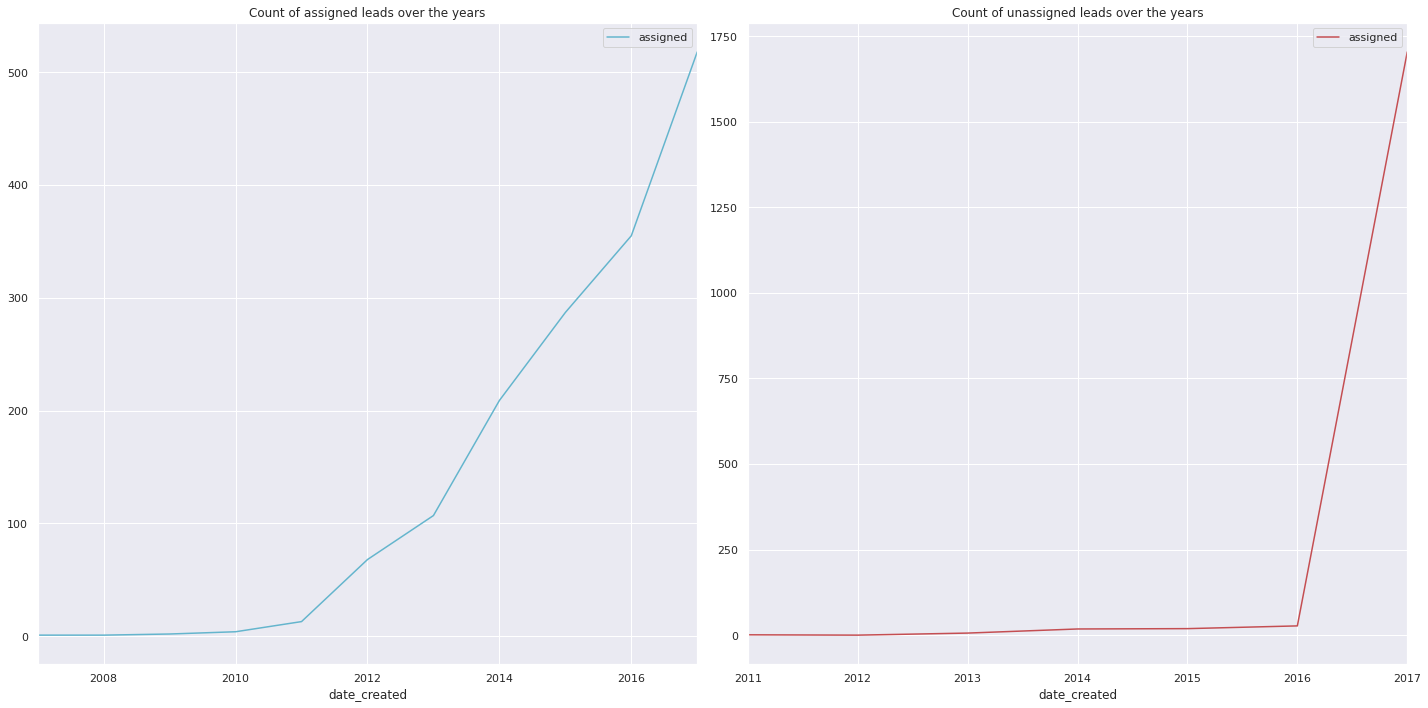

In [66]:
f= plt.figure(figsize=(20,10))

ax=f.add_subplot(121)
df_yoy_assigned_count.plot(color='c',ax=ax)
ax.set_title('Count of assigned leads over the years')

ax=f.add_subplot(122)
df_yoy_unassigned_count.plot(color='r',ax=ax)
ax.set_title('Count of unassigned leads over the years')


Text(0.5, 1.0, 'YOY Count of Unassigned leads')

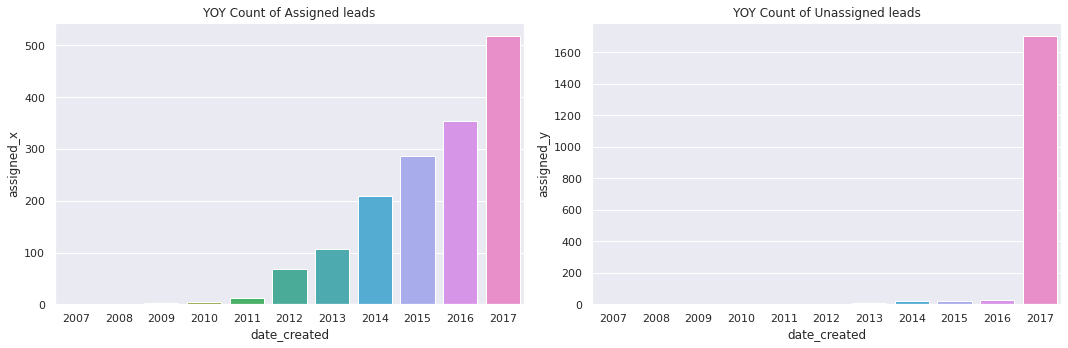

In [67]:
years = df_yoy_assign_count['date_created'].dt.year

f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.barplot(x = years, y ='assigned_x', data = df_yoy_assign_count,ax=ax)
ax.set_title('YOY Count of Assigned leads')

ax=f.add_subplot(122)
sns.barplot(x = years, y ='assigned_y', data = df_yoy_assign_count, ax=ax)
ax.set_title('YOY Count of Unassigned leads')

In [68]:
df_yoy_assign_count.set_index('date_created',inplace=True)

In [69]:
df_yoy_assign_count['perc_assigned'] = df_yoy_assign_count['assigned_x'].pct_change(freq='Y')*100
df_yoy_assign_count['cum_perc_assigned'] = 100*df_yoy_assign_count['assigned_x']/df_yoy_assign_count['assigned_x'].sum()

In [70]:
df_yoy_assign_count

,assigned_x,assigned_y,perc_assigned,cum_perc_assigned
date_created,,,,
2007-12-31,1,0.0,NaN,0.063898
2008-12-31,1,0.0,0.000000,0.063898
2009-12-31,2,0.0,100.000000,0.127796
2010-12-31,4,0.0,100.000000,0.255591
2011-12-31,13,1.0,225.000000,0.830671
2012-12-31,68,0.0,423.076923,4.345048
2013-12-31,107,6.0,57.352941,6.837061
2014-12-31,209,18.0,95.327103,13.354633
2015-12-31,287,19.0,37.320574,18.338658


We can see that there has been a consistent increase in the assigned lead thorughout the years. Year on year percentage and cumulative percentage has been provided in the dataframe above

### `Question 5 (Bonus Question):

#### Investigate the data however you wish and discuss any interesting insights you can find in the data. Don’t feel pressured to spend hours on this?

Due to time constraints I'm writing some insights which I could have included in my solutions.

1. We can look for Feature importance matrix after we are able to derive a relationship between the target variable with the input features.
2. We can cluster leads about where does high, mid and low revenue customer come from like i segmented age into age groups
3. We can impute the missing data by using KNN technqiue if we can ignore the baisness with the data.
4. Assigned lead percentage could be used for predicting the target revenue as I did in one of my solutions.